<a href="https://colab.research.google.com/github/Tsutomu-dayoo/DNN_lerning/blob/master/GaussianOptimaizationTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
pip install GPyOpt pyDOE

     |████████████████████████████████| 61kB 8.0MB/s 
     |████████████████████████████████| 1.0MB 9.9MB/s 
     |████████████████████████████████| 71kB 11.5MB/s 
  Created wheel for GPyOpt: filename=GPyOpt-1.2.5-cp36-none-any.whl size=83027 sha256=009d2c5dc9b99451cca4598b1e67bcdcb6d25fa34a4bd21ed2e936149ab04ec2
  Stored in directory: /root/.cache/pip/wheels/33/1d/87/dc02440831ba986b1547dd11a7dcd44e893b0527083066d869
  Created wheel for pyDOE: filename=pyDOE-0.3.8-cp36-none-any.whl size=18178 sha256=9a88770beb507808b3a410ba141b1f9fcc2fb982bb69ca3238820791a447b265
  Stored in directory: /root/.cache/pip/wheels/7c/c8/58/a6493bd415e8ba5735082b5e0c096d7c1f2933077a8ce34544
  Created wheel for GPy: filename=GPy-1.9.9-cp36-cp36m-linux_x86_64.whl size=2633969 sha256=40ecfd6eb56837a1e7523256288e3a7e567caec26835ed2afa4dd9f9012826ef
  Stored in directory: /root/.cache/pip/wheels/5d/36/66/2b58860c84c9f2b51615da66bfd6feeddbc4e04d887ff96dfa
  Created wheel for paramz: filename=paramz-0.9.5-cp36-non

[1, 3, 9, 8]


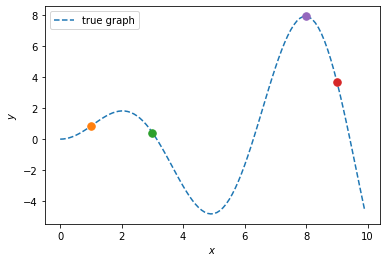

IndexError: ignored

In [39]:
import numpy as np  # NumPy を読み込む
import matplotlib.pyplot as plt  # Matplotlib を読み込む
import random
import GPy
import GPyOpt

def y(x):
  return np.sin(x) * x # 正弦関数の式を記述

def rosenbrock(X):
    return (1-X[:,0])**2 + 100*(X[:,1]-X[:,0]**2)**2

bounds =[{'name': 'x', 'type': 'continuous', 'domain': (min,max)}]
min = 0
max = 10
x = np.arange(min, max, 0.1)  # x座標を-10 から 10 まで 0.1 きざみで取得
plt.plot(x, y(x),linestyle="--",label='true graph')  # x, y をプロット
l=random.sample(range(min,max,1), k=4)
print(l)
for i in range(len(l)):
  plt.plot(l[i],y(l[i]),marker='.',markersize=15)#plt.plot(x座標, y座標,marker = '点の形',color = '点の色',markersize = 点のサイズ)
plt.xlabel("$x$") 
plt.ylabel("$y$") 
plt.legend()
plt.show()  # グラフを表示

myProblem = GPyOpt.methods.BayesianOptimization(rosenbrock,                   #最適化したい関数
                                                domain=bounds,                #変数の範囲
                                                acquisition_type='EI',        #獲得関数の種類
                                                exact_feval = True,           #最終出力を計算するか
                                                initial_design_type ="latin", #初期実験の方法(ラテン超方格実験)
                                                initial_design_numdata=20 )   #初期実験の実験数
max_iter = 30
myProblem.run_optimization(max_iter) 

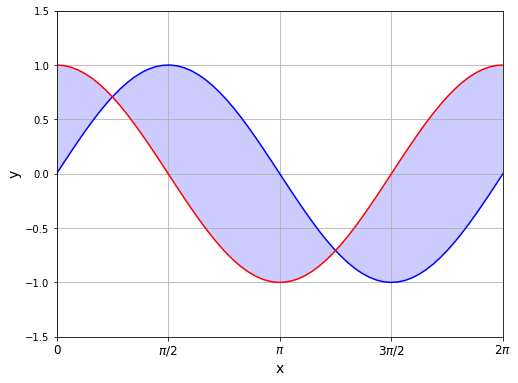

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# 円周率を定義
pi = np.pi

# プロットするデータを用意
x = np.arange(0, 3*pi, 0.1)
y1 = np.sin(x)
y2 = np.cos(x)

# FigureとAxesの設定
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111)
ax.grid()
ax.set_xlabel("x", fontsize = 14)
ax.set_ylabel("y", fontsize = 14)
ax.set_xlim(0.0, 2 * pi)
ax.set_ylim(-1.5, 1.5)
ax.set_xticks([0, pi/2, pi, 3*pi/2, 2*pi])
ax.set_xticklabels(["0", "$\pi/2$", "$\pi$", "$3\pi/2$", "$2\pi$"],
                   fontsize = 12)

# Axesにグラフをプロット
ax.plot(x, y1, color = "blue")
ax.plot(x, y2, color = "red")

# y1とy1の間をライム色で塗り潰す
ax.fill_between(x, y1, y2, facecolor='blue', alpha=0.2)

plt.show()